## Test Distribution Visualization

In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time

from comparison.ensemble import RegressionTreeBoosting, RegressionTreeEnsemble
from comparison.EKNN import EKNN
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import GradientBoostingRegressor

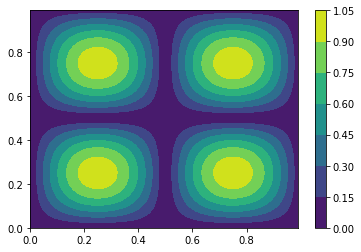

In [2]:
generator=TestDistribution(8).returnDistribution()
np.random.seed(3)

axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T

predict_result=generator.evaluate(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

0.1296392432449996

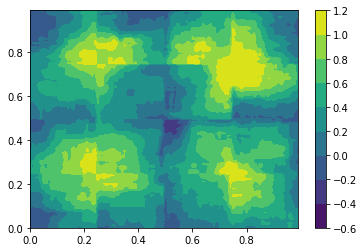

In [13]:
generator=TestDistribution(8).returnDistribution()
np.random.seed(3)
X_train,Y_train=generator.generate(1000)
X_test,Y_test = generator.generate(1000)
axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
max_depth,order, lamda = 4,1, 0.00000001
model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=3,
                         max_depth=max_depth,
                         order=order,
                         lamda = lamda,
                          V=10)
model.fit(X_train, Y_train)
predict_result=model.predict(X_grid).reshape(-1,100)
MSE(model.predict(X_test),Y_test)


predict_result[predict_result>1.1] = 1.1

plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()



In [16]:
R = np.ones(5).reshape(1,-1)

In [23]:
R @ R.T

array([[5.]])

In [22]:
np.linalg.inv(inv_mat)

array([[ 8.03921569, -1.96078431, -1.96078431, -1.96078431, -1.96078431],
       [-1.96078431,  8.03921569, -1.96078431, -1.96078431, -1.96078431],
       [-1.96078431, -1.96078431,  8.03921569, -1.96078431, -1.96078431],
       [-1.96078431, -1.96078431, -1.96078431,  8.03921569, -1.96078431],
       [-1.96078431, -1.96078431, -1.96078431, -1.96078431,  8.03921569]])

GradientBoostingRegressor(n_estimators=500)

0.111484205447525

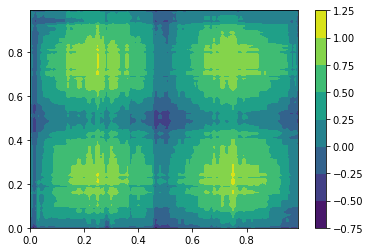

In [4]:
model_GBRT = GradientBoostingRegressor(n_estimators = 500)

model_GBRT.fit(X_train, Y_train)
y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score
predict_result=model_GBRT.predict(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

DecisionTreeRegressor(max_depth=2)

0.17891237402226512

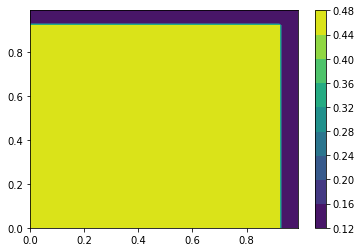

In [18]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor(max_depth = 2)

model_DT.fit(X_train, Y_train)
y_hat=model_DT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score
predict_result=model_DT.predict(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

In [16]:

generator=TestDistribution(3).returnDistribution()
np.random.seed(3)
X_train,Y_train=generator.generate(3000)
X_test,Y_test = generator.generate(1000)


model_GBRT = GradientBoostingRegressor(n_estimators = 500)

model_GBRT.fit(X_train, Y_train)
y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

max_depth , order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up ,step, lamda =6, 1,0,0.6,0,1,2, 0.001


model = RegressionTree(estimator="naive_estimator",
                         splitter="maxedge",
                         min_samples_split=5,
                         max_depth=5,
                         order=order,
                         random_state=1,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up= truncate_ratio_up,
                      r_range_low=r_range_low,
                      r_range_up=r_range_up,
                      step=step,
                      lamda = lamda)
model.fit(X_train, Y_train)
MSE(model.predict(X_test),Y_test)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="varreduction",
                         min_samples_split=5,
                         max_depth=max_depth,
                         order=order,
                         random_state=1,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up= truncate_ratio_up,
                      r_range_low=r_range_low,
                      r_range_up=r_range_up,
                      step=step,
                      lamda = lamda)
model.fit(X_train, Y_train)
MSE(model.predict(X_test),Y_test)




GradientBoostingRegressor(n_estimators=500)

167.2057502948516

30476.697196049055

805.6007052231561

array([[0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.        , 0.46369689, 1.        ]])

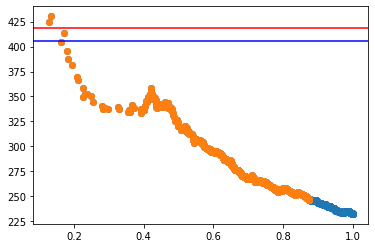

In [12]:
node_idx=0
query_obj=list(model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= X_range.mean(axis=0)+0.12
order, truncate_ratio_low, truncate_ratio_up = order, truncate_ratio_low, truncate_ratio_up 

sorted_ratio, sorted_prediction, intercept ,_= model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up,0,1,step,lamda)
_=plt.scatter((sorted_ratio),sorted_prediction)
_=plt.scatter((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")

In [38]:
X = np.arange(-1,1,0.001)
Y = np.exp(-((X-0.4)/0.1)**2)+np.exp(-((X+0.4)/0.1)**2)

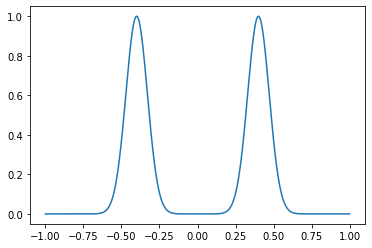

In [39]:
plt.plot(X,Y)

In [44]:
model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="varreduction",
                         min_samples_split=1,
                         max_depth=1,
                         order=order,
                         random_state=1,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up= truncate_ratio_up,
                      r_range_low=r_range_low,
                      r_range_up=r_range_up,
                      step=step,
                      lamda = lamda)

In [49]:
model.fit(X.reshape(-1,1), Y)
node_idx = 0
query_obj=list(model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y

In [10]:
a= np.array([1,2,3,1])

In [9]:
np.unique(a)

array([1, 2, 3])

In [11]:
np.quantile(a,[i/10 for i in range(10)])

array([1. , 1. , 1. , 1. , 1.2, 1.5, 1.8, 2.1, 2.4, 2.7])

In [21]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data_file_dir = "./data/real_data_cleaned/"

data_file_name = "abalone.csv"

log_file_dir = "./results/realdata/"


data_name = os.path.splitext(data_file_name)[0]
data_file_path = os.path.join(data_file_dir, data_file_name)
data = pd.read_csv(data_file_path)
data = np.array(data)
X = data[:,1:]
y = data[:,0]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)



In [24]:
X

array([[0.        , 0.5135135 , 0.5210084 , ..., 0.1503025 , 0.132324  ,
        0.147982  ],
       [0.        , 0.3716215 , 0.352941  , ..., 0.066241  , 0.0631995 ,
        0.068261  ],
       [0.5       , 0.614865  , 0.6134455 , ..., 0.1718225 , 0.1856485 ,
        0.207773  ],
       ...,
       [0.        , 0.7094595 , 0.7058825 , ..., 0.3527235 , 0.37788   ,
        0.305431  ],
       [0.5       , 0.743243  , 0.722689  , ..., 0.3564225 , 0.342989  ,
        0.293473  ],
       [0.        , 0.858108  , 0.840336  , ..., 0.6351715 , 0.49506254,
        0.49177875]])

In [43]:
R

array([[1.0000000e-01, 1.0000000e-02, 1.0000000e-03, 1.0000000e-04,
        1.0000000e-05, 1.0000000e-06, 1.0000000e-07, 1.0000000e-08],
       [2.0000000e-01, 4.0000000e-02, 8.0000000e-03, 1.6000000e-03,
        3.2000000e-04, 6.4000000e-05, 1.2800000e-05, 2.5600000e-06],
       [3.0000000e-01, 9.0000000e-02, 2.7000000e-02, 8.1000000e-03,
        2.4300000e-03, 7.2900000e-04, 2.1870000e-04, 6.5610000e-05],
       [4.0000000e-01, 1.6000000e-01, 6.4000000e-02, 2.5600000e-02,
        1.0240000e-02, 4.0960000e-03, 1.6384000e-03, 6.5536000e-04],
       [5.0000000e-01, 2.5000000e-01, 1.2500000e-01, 6.2500000e-02,
        3.1250000e-02, 1.5625000e-02, 7.8125000e-03, 3.9062500e-03],
       [6.0000000e-01, 3.6000000e-01, 2.1600000e-01, 1.2960000e-01,
        7.7760000e-02, 4.6656000e-02, 2.7993600e-02, 1.6796160e-02],
       [7.0000000e-01, 4.9000000e-01, 3.4300000e-01, 2.4010000e-01,
        1.6807000e-01, 1.1764900e-01, 8.2354300e-02, 5.7648010e-02],
       [8.0000000e-01, 6.4000000e-01, 5.1

In [8]:
C = 5
V = 7
R = np.array([[(j/V)**i for i in range(1,C+1)] for j in range(1,V+1)])

In [9]:
 (np.eye(V)- R @ np.linalg.pinv(R.T @ R) @ R.T).sum(axis =1 )/(V -(R @ np.linalg.pinv(R.T @ R) @ R.T).sum())

array([ 5.14285713, -9.85714283,  7.14285713,  2.14285714, -6.85714284,
        4.14285714, -0.85714287])

In [10]:
np.linalg.pinv(R.T @ R)

array([[    593.644537  ,   -4679.12846227,   12406.86445045,
         -13499.7413863 ,    5179.83358928],
       [  -4679.12846227,   38887.32464546, -106577.09782071,
         118593.88837681,  -46240.96764918],
       [  12406.86445046, -106577.09782073,  298805.14409102,
        -337997.32446053,  133418.30967286],
       [ -13499.74138631,  118593.88837685, -337997.32446057,
         387092.94888117, -154267.7388806 ],
       [   5179.83358928,  -46240.96764919,  133418.30967288,
        -154267.73888061,   61948.13889423]])

In [11]:
np.where(a>1000)[0]

NameError: name 'a' is not defined

In [12]:
for i in range(10,-1,-1):
    print(i)

10
9
8
7
6
5
4
3
2
1
0


In [19]:
np.int(R)

/tmp/ipykernel_17525/2151815024.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.int(R)


TypeError: only size-1 arrays can be converted to Python scalars

In [20]:
a = R[0]

In [22]:
[int(i) for i in a]

[0, 0, 0, 0, 0]